In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


file_path = '/kaggle/input/child-weight-at-birth-and-gestation-details/babies.csv'

df = pd.read_csv(file_path)
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [32]:
#checking the null values in data
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

# **Data Cleaning# **

In [33]:
#filling gestation missing values
df['gestation'].mean()

updated_df = df
updated_df['gestation']=updated_df['gestation'].fillna(df['gestation'].mean())


#filling age missing values
df['age'].mean()

updated_df = df
updated_df['age']=updated_df['age'].fillna(df['age'].mean())

#filling height missing values
df['height'].mean()

updated_df = df
updated_df['height']=updated_df['height'].fillna(df['height'].mean())

#filling weight missing values
df['weight'].mean()

updated_df = df
updated_df['weight']=updated_df['weight'].fillna(df['weight'].mean())

#filling smoke missing values
df['smoke'].mode()

updated_df = df
updated_df['smoke']=updated_df['smoke'].fillna(df['smoke'].mode()[0])


updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1236 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1236 non-null   float64
 5   height     1236 non-null   float64
 6   weight     1236 non-null   float64
 7   smoke      1236 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [34]:
new_df = pd.DataFrame(updated_df,columns = ['bwt','gestation','parity','age','height','weight','smoke'])
new_df.head(5)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.000000,0,27.0,62.0,100.0,0.0
1,113,282.000000,0,33.0,64.0,135.0,0.0
2,128,279.000000,0,28.0,64.0,115.0,1.0
3,123,279.338512,0,36.0,69.0,190.0,0.0
4,108,282.000000,0,23.0,67.0,125.0,1.0


# Exploratory Analysis and Visualization

In [35]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

# Histogram showing what age most women give births.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


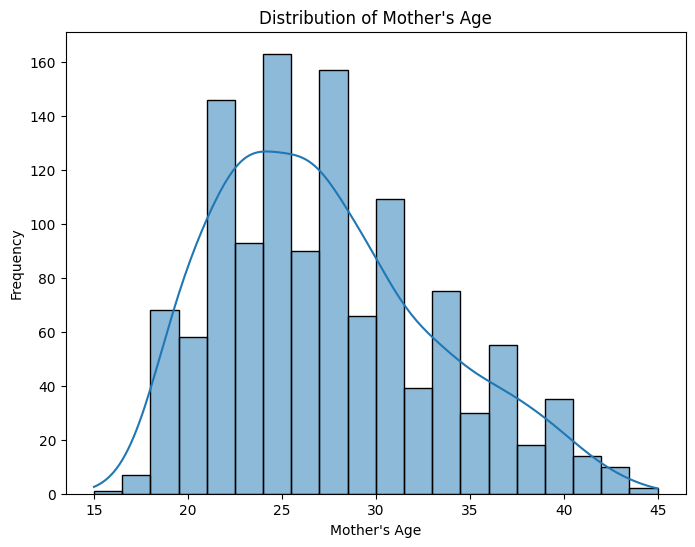

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(new_df['age'], kde=True,bins=20)
plt.title('Distribution of Mother\'s Age')
plt.xlabel('Mother\'s Age')
plt.ylabel('Frequency')
plt.show()


# Showing correlation between the age of the mother and gestation age using scatter plot

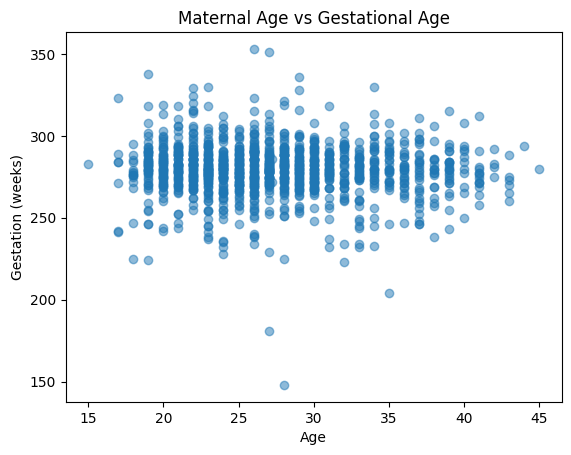

Correlation between age and gestation: -0.055828716194251296


In [37]:
# Calculate correlation
correlation_age_gestation = new_df['age'].corr(new_df['gestation'])

# Scatter plot for visualization
plt.scatter(new_df['age'],new_df['gestation'], alpha=0.5)
plt.title('Maternal Age vs Gestational Age')
plt.xlabel('Age')
plt.ylabel('Gestation (weeks)')
plt.show()

print(f"Correlation between age and gestation: {correlation_age_gestation}")


In [38]:
# Central tendency
print("Mean age:", new_df['age'].mean())
print("Median age:", new_df['age'].median())
print("Mode age:", new_df['age'].mode()[0])

Mean age: 27.255267423014587
Median age: 26.0
Mode age: 23.0


# Scatter plot showing the relationship between maternal Age and Birth Weight

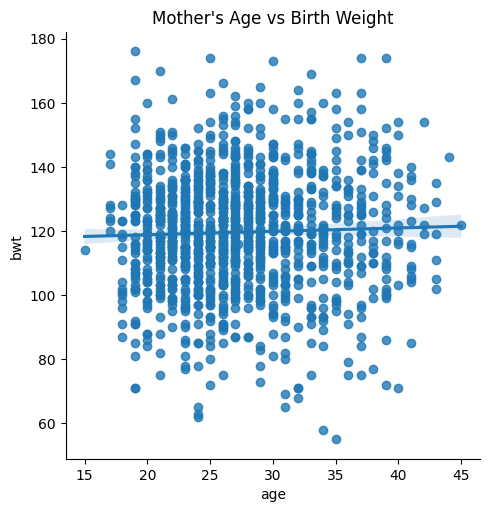

                age  gestation
age        1.000000  -0.055829
gestation -0.055829   1.000000


In [39]:
sns.lmplot(x='age', y='bwt',data = new_df)
plt.title('Mother\'s Age vs Birth Weight')
plt.show()

correlation = new_df[['age', 'gestation']].corr()
print(correlation)


In [43]:
X = new_df[['age', 'weight', 'smoke']]
y = new_df['bwt']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     34.10
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.58e-21
Time:                        17:04:23   Log-Likelihood:                -5292.6
No. Observations:                1236   AIC:                         1.059e+04
Df Residuals:                    1232   BIC:                         1.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.7244      3.744     28.771      0.0

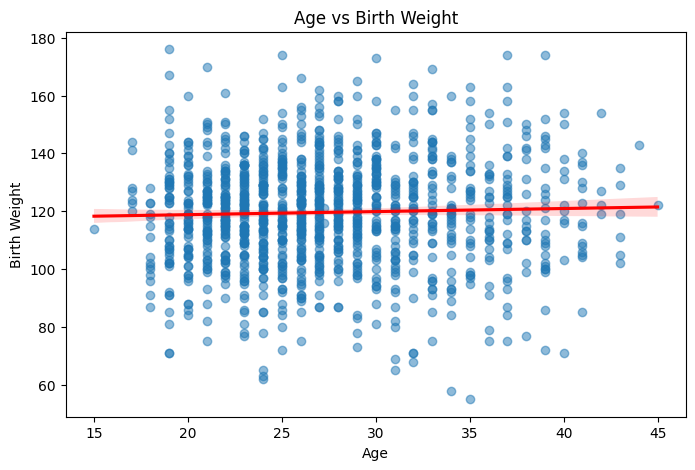

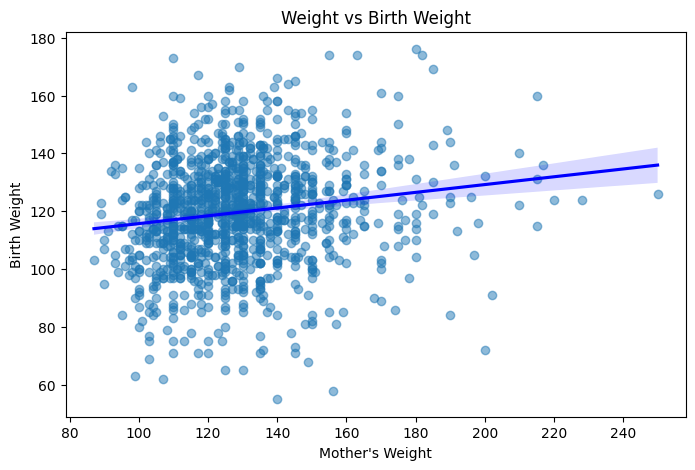

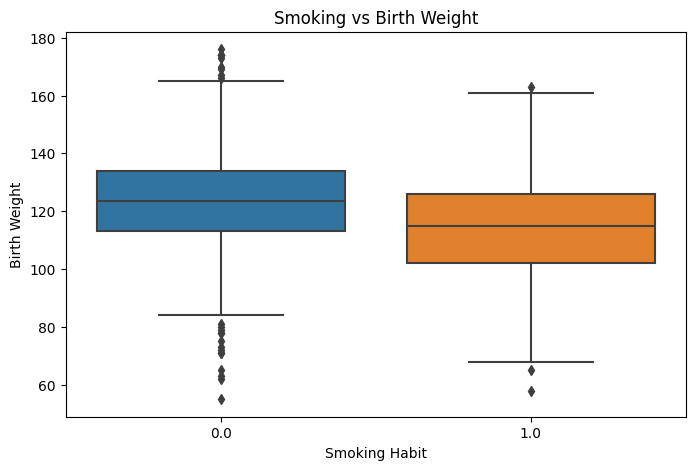

In [44]:

# Scatter plot for age vs. birth weight
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='bwt', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Birth Weight')
plt.xlabel('Age')
plt.ylabel('Birth Weight')
plt.show()

# Scatter plot for weight vs. birth weight
plt.figure(figsize=(8, 5))
sns.regplot(x='weight', y='bwt', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Weight vs Birth Weight')
plt.xlabel('Mother\'s Weight')
plt.ylabel('Birth Weight')
plt.show()

# Box plot for smoke vs. birth weight (since smoke is categorical)
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoke', y='bwt', data=df)
plt.title('Smoking vs Birth Weight')
plt.xlabel('Smoking Habit')
plt.ylabel('Birth Weight')
plt.show()


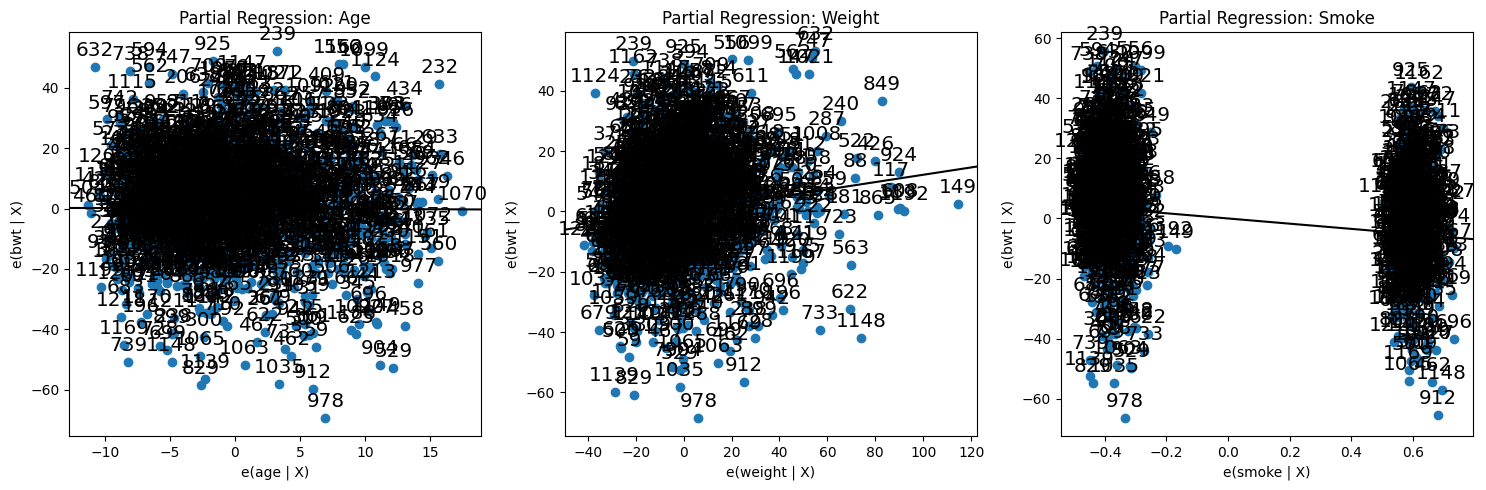

In [46]:
from statsmodels.graphics.regressionplots import plot_partregress

# Plot partial regression plot for each predictor
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_partregress('bwt', 'age', ['weight', 'smoke'], data=new_df, ax=axes[0])
axes[0].set_title('Partial Regression: Age')

plot_partregress('bwt', 'weight', ['age', 'smoke'], data=new_df, ax=axes[1])
axes[1].set_title('Partial Regression: Weight')

plot_partregress('bwt', 'smoke', ['age', 'weight'], data=new_df, ax=axes[2])
axes[2].set_title('Partial Regression: Smoke')

plt.tight_layout()
plt.show()
